In [1]:
## importing essential libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df=pd.read_csv("C:\\Users\\bhavy\\Desktop\\WineQT.csv")
df.head()
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [2]:
## checking the different qulaity points
df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [3]:
## checking for the missing values in the dataset
df.isnull().sum()
## which shows we do not have any missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
## analysing the information related with the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.shape
## it is showing we have 1143 records in the data set and along with it we have 13 features assocaited with it

(1143, 13)

In [6]:
## dropping unwanted columns from the dataset
df.pop("Id")

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [7]:
## selecting the x variables and y variables of the dataset
y=df["quality"]
x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


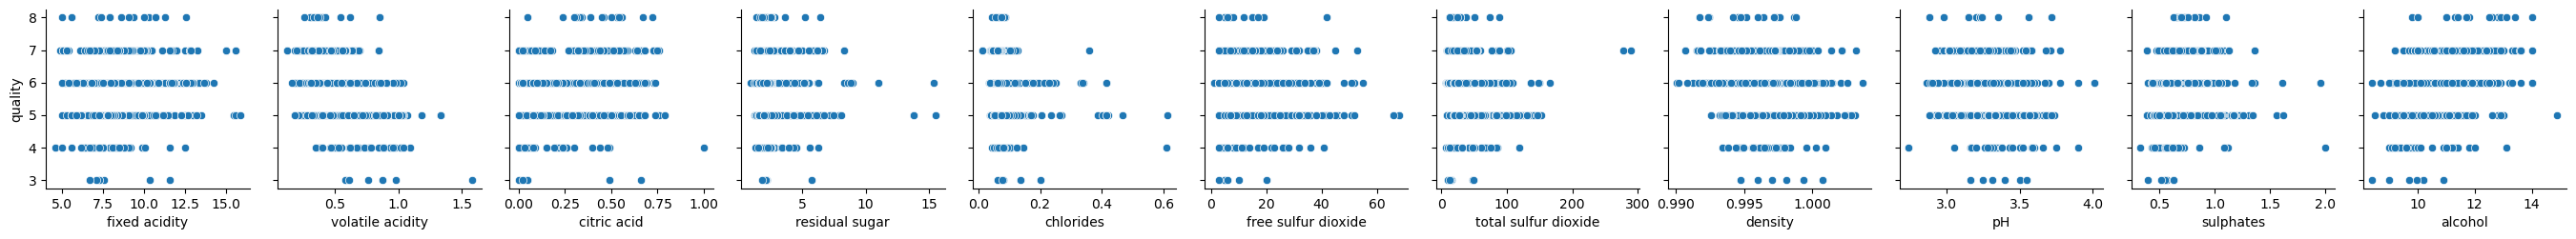

In [8]:
## plotting the pairplot against each coloumn of the dataset
col=df.columns
print(col)
sns.pairplot(df,x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], y_vars="quality", kind="scatter")

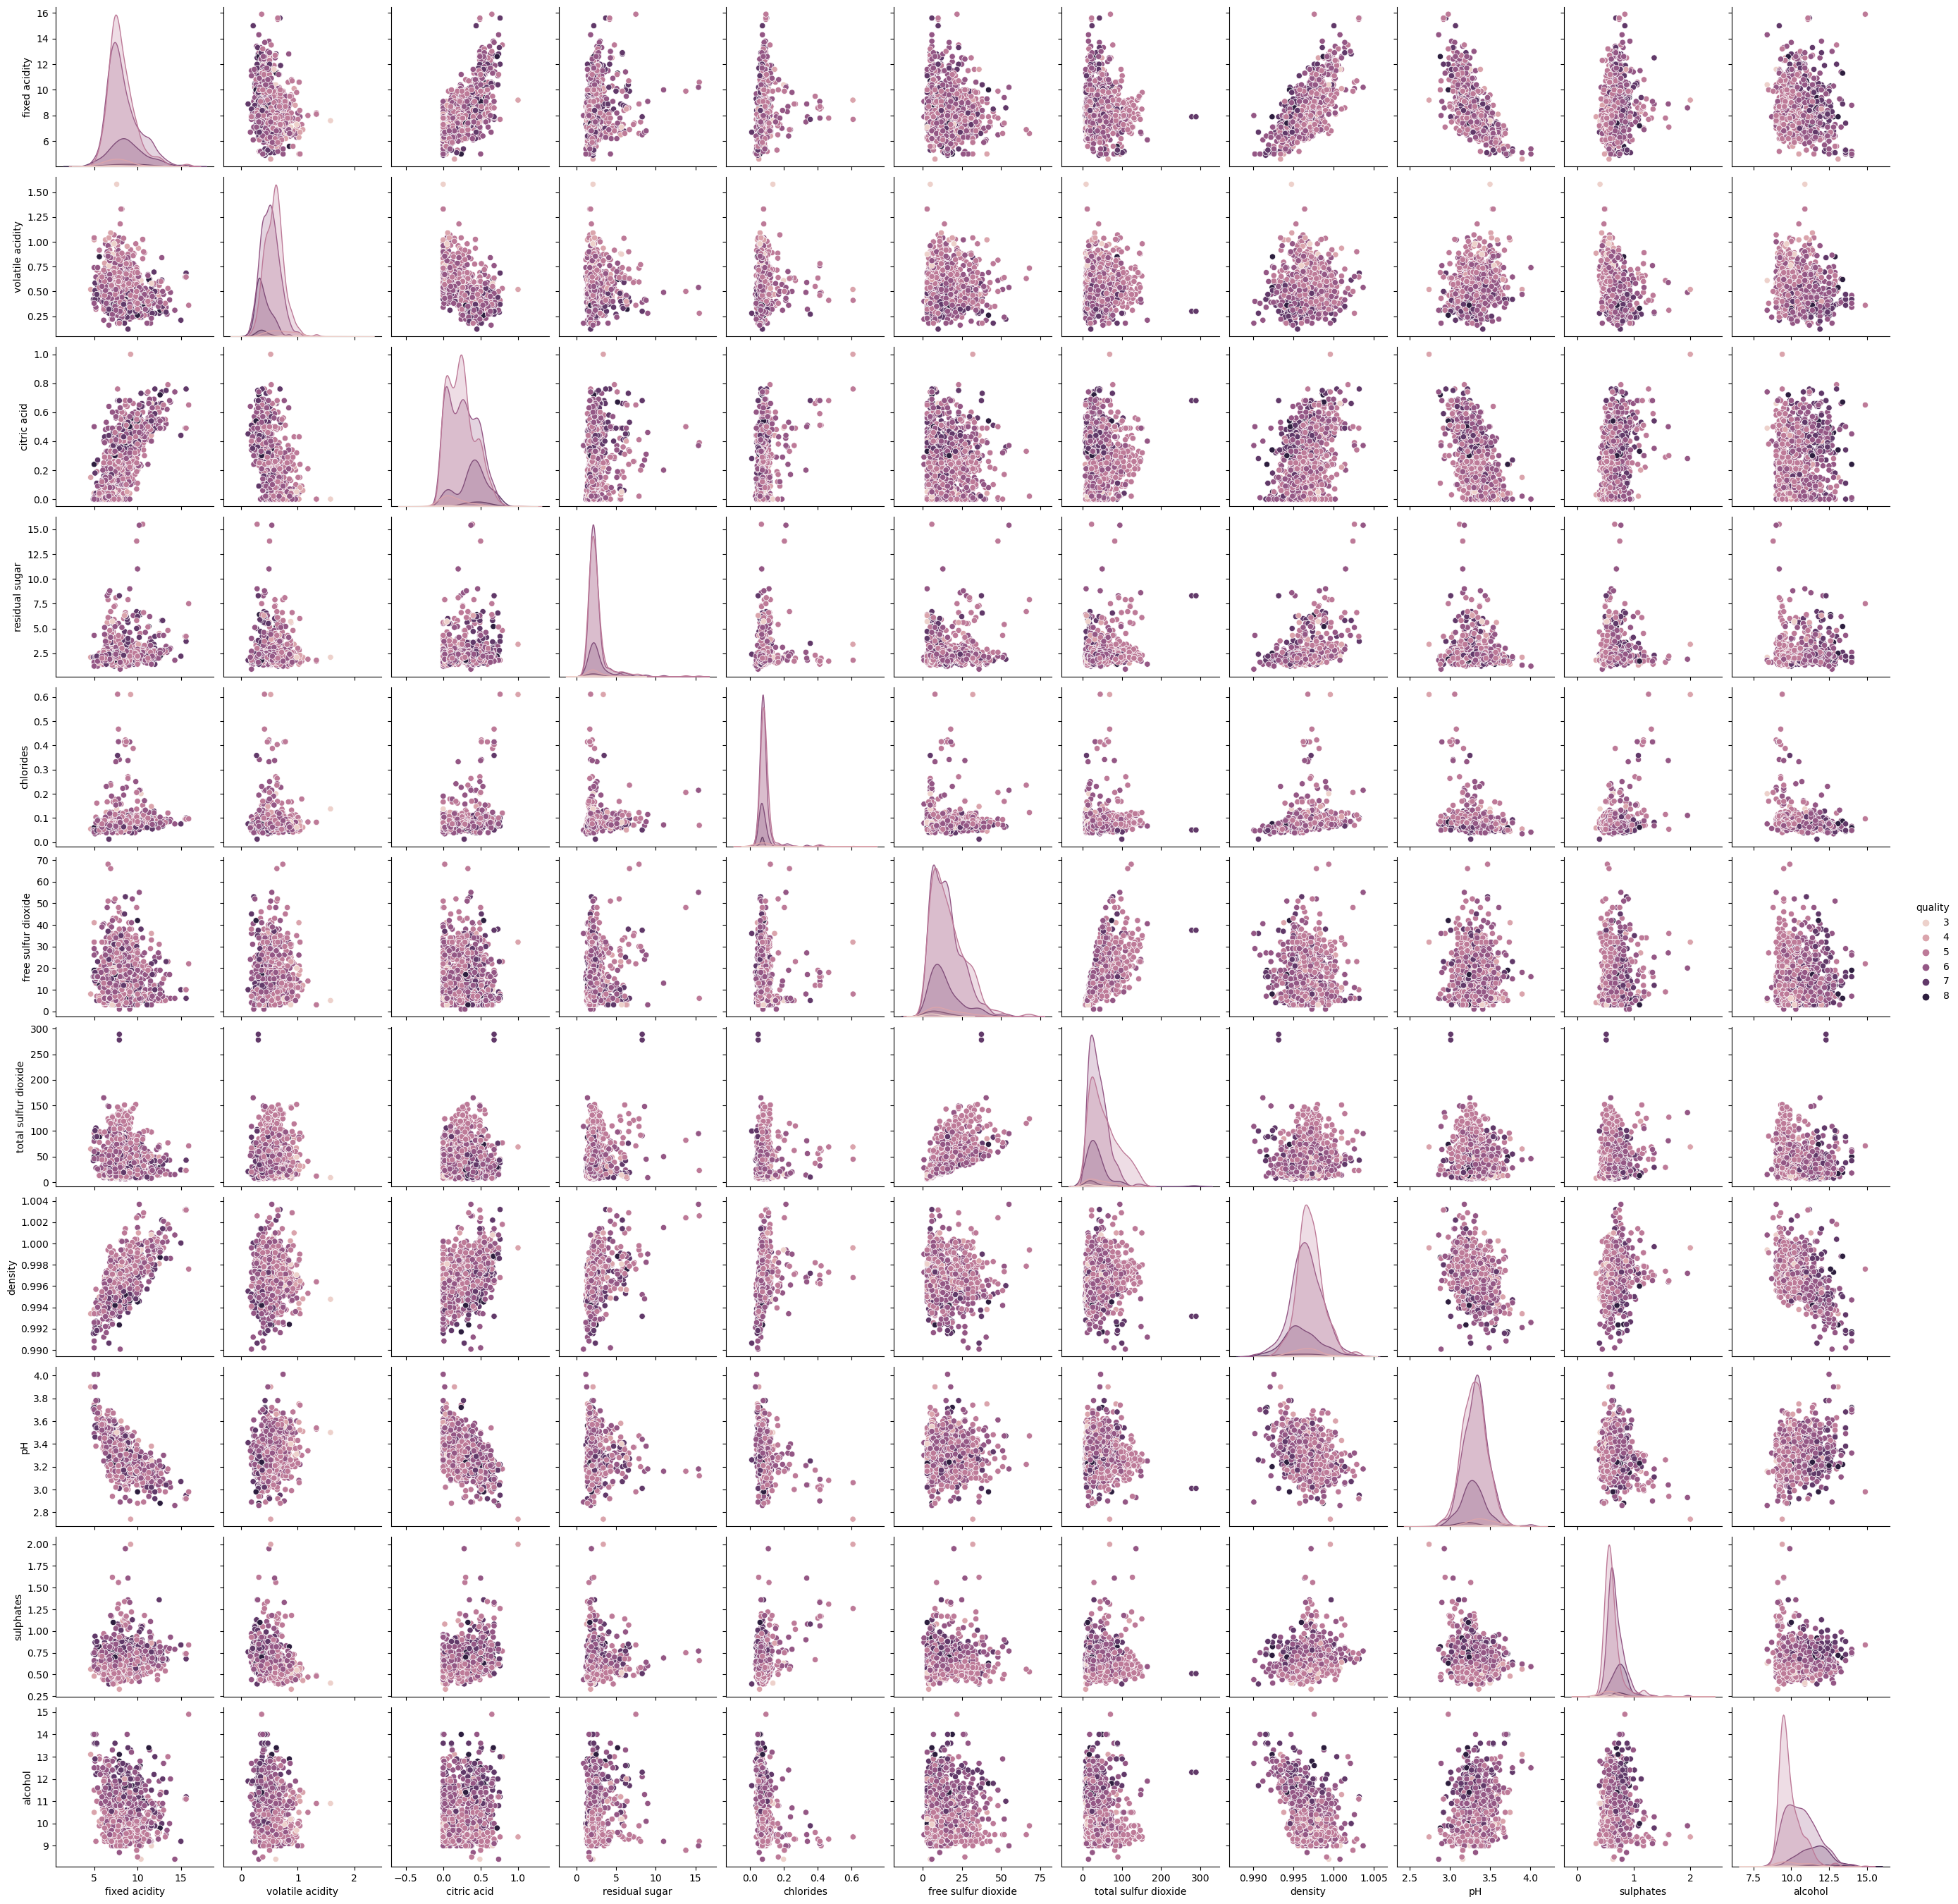

In [9]:

sns.pairplot(df, hue="quality")

In [10]:
from sklearn.linear_model import LinearRegression
## training and testing of the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
## by setting test_size 0.2 we are training the 80% of the dataset and rest 20% is set for testing
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [11]:
pr=lr.predict(x_test)

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
r2_score(y_test,pr)

0.3691490685088752

In [13]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
lr.predict([[8, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.97, 3.5, 0.65, 10.2]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.88086839])

In [15]:
lr.predict([[10, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.97, 3.5, 0.65, 10.2]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.91597265])

In [16]:
lr.predict([[6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.9017943])